In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import cifar10

#### Loading the dataset

In [5]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


#### Normalizing the Images

In [6]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

##### Randomly Checking a image

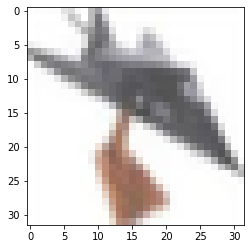

In [8]:
plt.imshow(x_test[215])

### Building a Convolutional Neural Network

In [9]:
cifar10_model=tf.keras.models.Sequential()

In [10]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [11]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [12]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [13]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [14]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [15]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [16]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [17]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [18]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [19]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

#### Compiling the Model

In [20]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

#### Training the Model

In [21]:
cifar10_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3891 - sparse_categorical_accuracy: 0.4986
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9981 - sparse_categorical_accuracy: 0.6457
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8550 - sparse_categorical_accuracy: 0.6989
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7676 - sparse_categorical_accuracy: 0.7270
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7025 - sparse_categorical_accuracy: 0.7529
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6447 - sparse_categorical_accuracy: 0.7729
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5995 - sparse_categorical_accuracy: 0.7870
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5586 - sparse_categorical_accuracy: 0.7997
Epoch 9/15
1563/1563 [==========

In [22]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6763 - sparse_categorical_accuracy: 0.7808


In [23]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7807999849319458
